In [1]:
import sys
import subprocess
sys.path.append('f:/seismic/code/core')
sys.path.append('/seismic/code/core')
sys.path.append('/kaggle/input/my-seismic-library/')
import kaggle_support as kgs
import importlib
import seis_model
import numpy as np

F:/seismic/models/brendan/*.pth
Loading:  F:/seismic/models/brendan\unet2d_caformer_seed3_epochbest.pt
n_models: 1


Style_B
too low
only doing style A in test mode
styleB not active yet
False False
(4901, 4901)


100%|██████████| 1/1 [00:00<00:00,  2.23it/s]


Style_A
too low
only doing style A in test mode
styleB not active yet
False False
(4901, 4901)


100%|██████████| 1/1 [00:00<00:00, 20.15it/s]


False True
(4901, 1073)
capturing graph
capturing graph
True True
(4901, 1073)
capturing graph
FlatVel_B
too low
only doing style A in test mode
styleB not active yet
False False
(4901, 4901)


100%|██████████| 1/1 [00:00<00:00, 19.09it/s]


FlatVel_A
too low
only doing style A in test mode
styleB not active yet
False False
(4901, 4901)


100%|██████████| 1/1 [00:00<00:00, 19.81it/s]


FlatFault_B
too low
only doing style A in test mode
styleB not active yet
False False
(4901, 4901)


100%|██████████| 1/1 [00:00<00:00, 19.65it/s]


FlatFault_A
too low
only doing style A in test mode
styleB not active yet
False False
(4901, 4901)


100%|██████████| 1/1 [00:00<00:00, 20.02it/s]


CurveVel_B
too low
only doing style A in test mode
styleB not active yet
False False
(4901, 4901)


100%|██████████| 1/1 [00:00<00:00, 20.13it/s]


CurveVel_A
too low
only doing style A in test mode
styleB not active yet
False False
(4901, 4901)


100%|██████████| 1/1 [00:00<00:00, 20.03it/s]


CurveFault_B
too low
only doing style A in test mode
styleB not active yet
False False
(4901, 4901)


100%|██████████| 1/1 [00:00<00:00, 19.98it/s]


CurveFault_A
too low
only doing style A in test mode
styleB not active yet
False False
(4901, 4901)


100%|██████████| 1/1 [00:00<00:00, 20.12it/s]


prior test 9.764424715292229e-14 1.679685575695089e-05
False False
(4901, 4901)
prior test 5.153425540527223e-06 10.306629495695233
prior test 1.123679396601053e-13 1.4104176818463543e-05
Mismatch to hosts: 3.5444538831673834e-05
adjoint 1.0469327228063152e-17 4.904263242783745e-05
diff 1.5727204184213184e-13 1.6588860071825717e-07
Mismatch to hosts: 1.5741465383079042e-05
adjoint 7.806255641895632e-18 0.0001352831488805375
diff 1.1763480308715764e-13 1.4481413610833205e-07
8.23042934313816e-16 1.0896616942090986e-11
All tests passed!


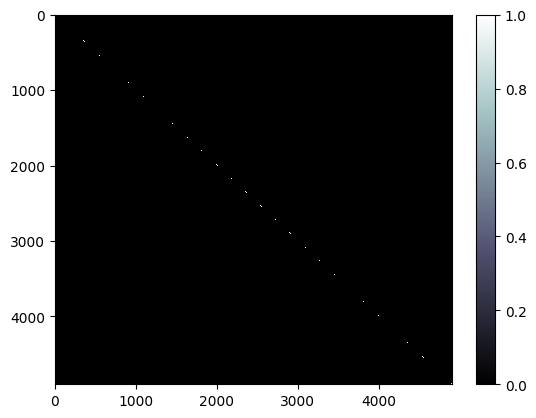

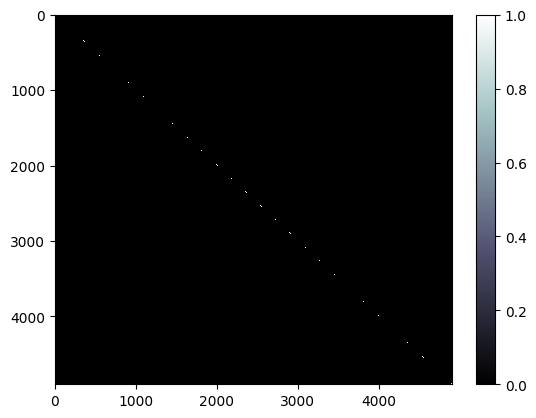

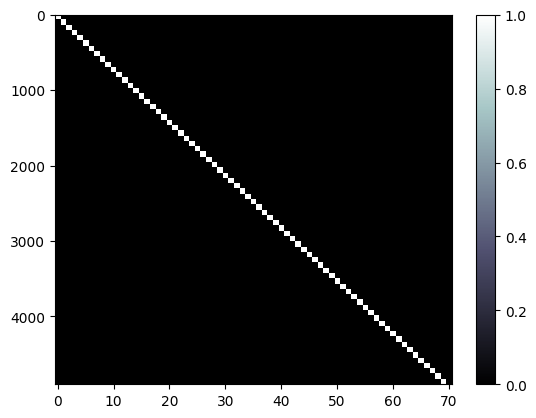

In [2]:
import seis_test
seis_test.run_all_tests()

In [3]:
# Download cache
#kgs.download_cache()

In [6]:
# Set up model
importlib.reload(seis_model)
model = seis_model.default_model()
model.models[1].run_in_parallel = True

styleB not active yet


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.37it/s]


         family      score
0  CurveFault_A   4.213398
1    CurveVel_A  11.067551
2   FlatFault_A   2.167632
3     FlatVel_A   1.303673
4       Style_A  29.756932
Combined:  9.70183711834343


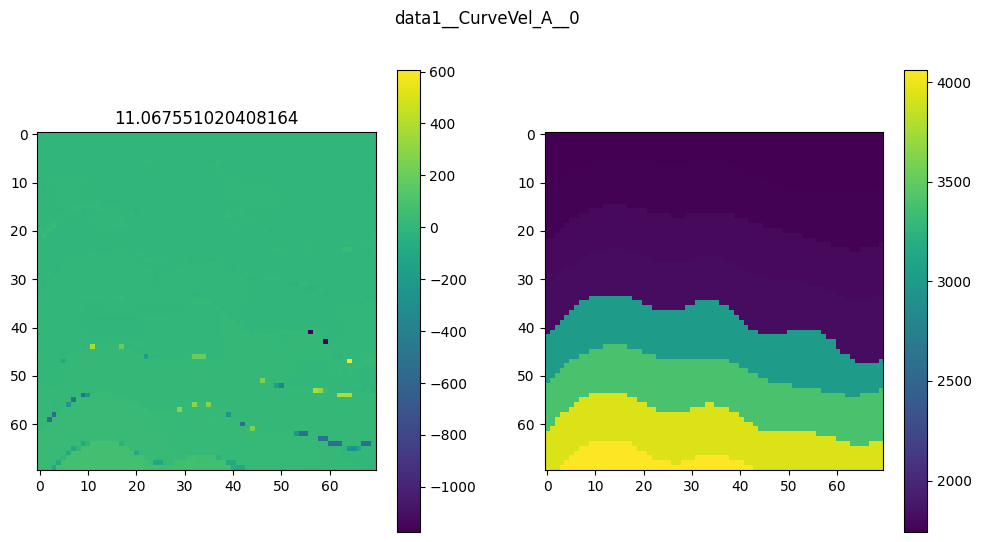

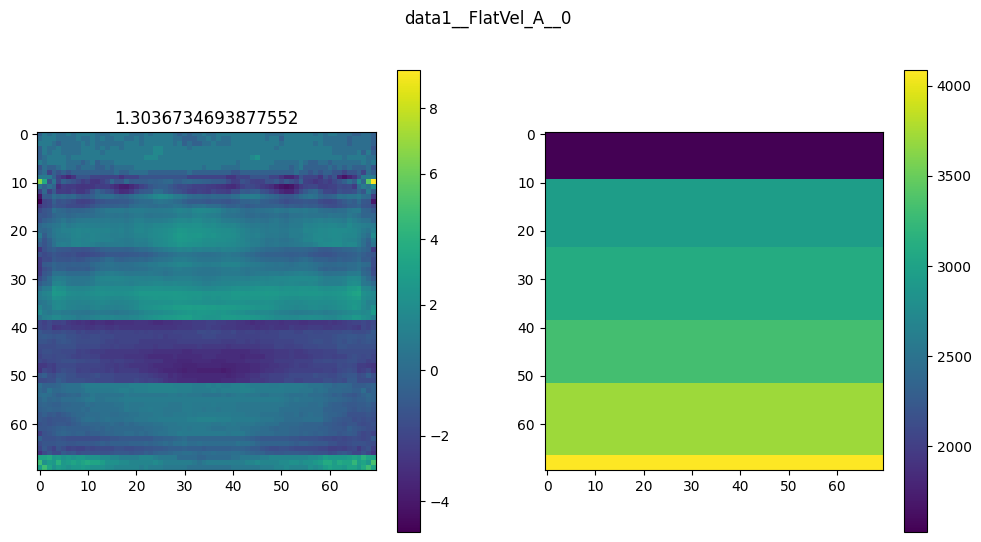

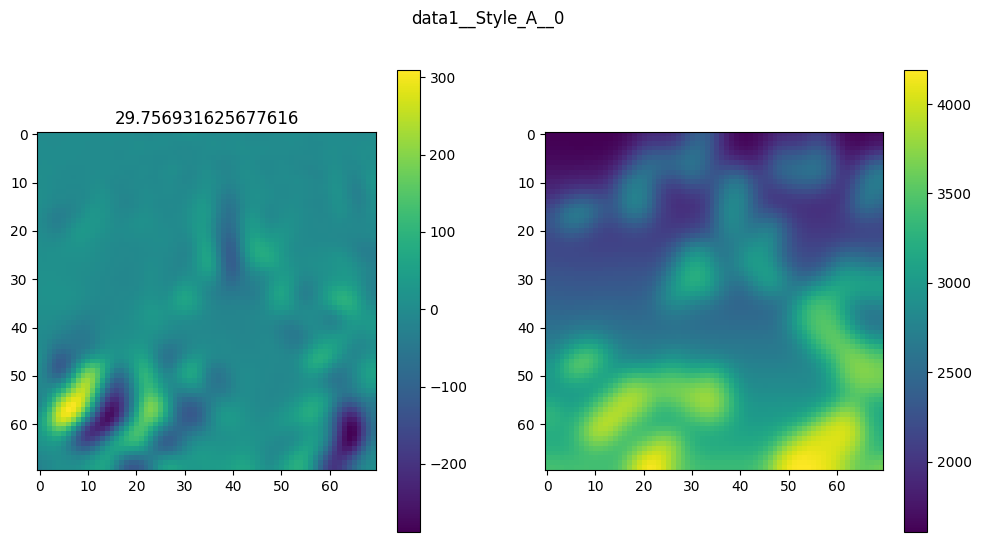

In [7]:
# Check model accuracy
seis_model.check_model_accuracy(model, 10)

In [6]:
# Full run
kgs.disable_caching = False
step = 6000
for ii in np.arange(0,len(kgs.load_all_test_data()),step):
    print(ii)
    data_out = model.infer(kgs.load_all_test_data()[ii:ii+step])
    # kgs.write_submission_file(data_out)
    kgs.upload_cache()

0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000


In [ ]:
# Upload cache
#kgs.upload_cache()